In [2]:
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import emoji

In [3]:
df = pd.read_csv(r"C:\Users\jathi\Downloads\emotions.csv")

In [4]:
df.head()

,text,label
0,ive enjoyed being able to slouch about relax a...,0
1,i dont know i feel so lost,0
2,i was beginning to feel quite disheartened,0
3,i can still lose the weight without feeling de...,0
4,im feeling a little like a damaged tree and th...,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    12000 non-null  object
 1   label   12000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 187.6+ KB


In [6]:
df['text'][11000]

'i just know that i feel like writing all the time and i m always stunned at how much i accomplish even when i m constantly busy'

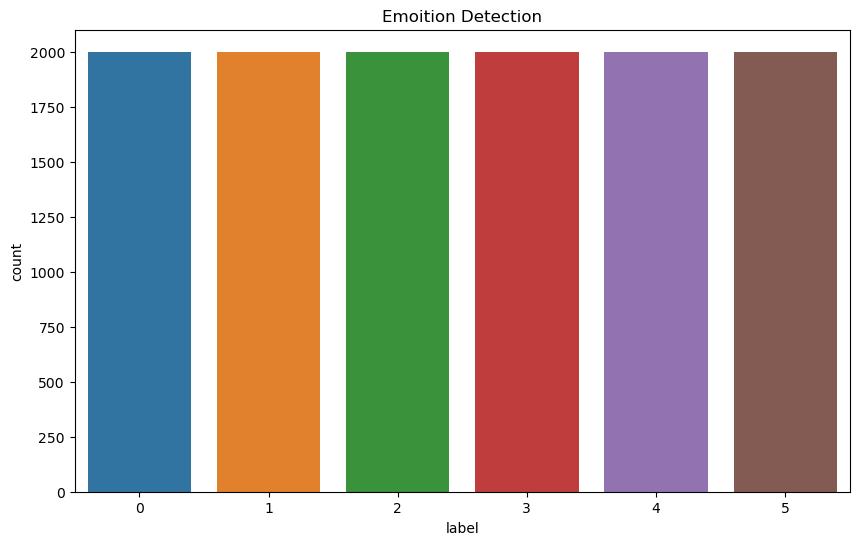

In [7]:
# Emoition analysis
plt.figure(figsize= (10, 6))
plt.title('Emoition Detection')
sns.countplot(x=df['label'])
plt.show()

In [8]:
df.dropna(inplace = True)

In [9]:
df[df['text'].isna()][['text', 'label']]

,text,label


In [10]:
df['text'].str.lower()

0        ive enjoyed being able to slouch about relax a...
1                               i dont know i feel so lost
2               i was beginning to feel quite disheartened
3        i can still lose the weight without feeling de...
4        im feeling a little like a damaged tree and th...
                               ...                        
11995    i feel weird using his first name but the alte...
11996    i read them i feel pleasantly surprised that t...
11997         i feel a strange sense of guilt about it all
11998    i let people know how i m actually feeling and...
11999    i told him that my medication was making me fe...
Name: text, Length: 12000, dtype: object

In [11]:
df

,text,label
0,ive enjoyed being able to slouch about relax a...,0
1,i dont know i feel so lost,0
2,i was beginning to feel quite disheartened,0
3,i can still lose the weight without feeling de...,0
4,im feeling a little like a damaged tree and th...,0
...,...,...
11995,i feel weird using his first name but the alte...,5
11996,i read them i feel pleasantly surprised that t...,5
11997,i feel a strange sense of guilt about it all,5
11998,i let people know how i m actually feeling and...,5


In [12]:
def eda(data,column):
    count = 0
    count = data[column].apply(lambda x: count + emoji.emoji_count(x)).sum()  #emoji count in the data
    upper =data[column].str.isupper().sum()
    url = data[column].apply(lambda x:   True  if re.search(r'www.\S+ | https?://\S+',x)  else False).sum()
    tags = data[column].apply(lambda x:   True  if re.search(r'<[^>]>+',x)  else False).sum()
    marks = data[column].apply(lambda x:   True  if re.search(r'[^a-zA-Z0-9 ]',x)  else False).sum()
    digits = data[column].apply(lambda x:   True  if re.search(r'[0-9]',x)  else False).sum()
    return  pd.Series({'Emoji':count,"upper case":upper,"urls" : url,"HTML tags":tags,'Punctuaton':marks,'Digits':digits})

In [13]:
eda(df,"text")

Emoji         0
upper case    0
urls          0
HTML tags     0
Punctuaton    0
Digits        0
dtype: int64

In [20]:
#df.to_csv('Emotion_Analysis.csv')

# Bag of Words(Count of words)

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
bow = CountVectorizer(stop_words='english', max_features=12000)  

In [16]:
bow.fit(df['text'])
X = bow.transform(df['text'])
y = df['label']

In [17]:
bow.vocabulary_

{'ive': 5287,
 'enjoyed': 3765,
 'able': 17,
 'slouch': 9464,
 'relax': 8374,
 'unwind': 11212,
 'frankly': 4322,
 'needed': 6616,
 'weeks': 11619,
 'end': 3724,
 'uni': 11127,
 'expo': 4004,
 'lately': 5489,
 'started': 9835,
 'feeling': 4184,
 'bit': 1140,
 'listless': 5718,
 'really': 8208,
 'good': 4518,
 'thing': 10558,
 'dont': 3343,
 'know': 5407,
 'feel': 4179,
 'lost': 5810,
 'beginning': 1012,
 'quite': 8068,
 'disheartened': 3227,
 'lose': 5804,
 'weight': 11627,
 'deprived': 3005,
 'im': 5092,
 'little': 5726,
 'like': 5658,
 'damaged': 2763,
 'tree': 10856,
 'roots': 8721,
 'wack': 11485,
 'stupid': 10034,
 'realise': 8194,
 'late': 5487,
 'don': 3335,
 'submissive': 10058,
 'time': 10646,
 've': 11327,
 'bdsm': 966,
 'stuff': 10023,
 'imagine': 5098,
 'just': 5353,
 'reasons': 8222,
 'marriage': 6017,
 'hard': 4778,
 'theyll': 10551,
 'bad': 850,
 'ugly': 11011,
 'parts': 7208,
 'make': 5928,
 'love': 5823,
 'feels': 4187,
 'awful': 814,
 'exposed': 4007,
 'people': 7303,

In [18]:
df1 = df.sample(12000)

In [19]:
#df1.to_csv('Emotion_Analysis.csv')

In [20]:
X = bow.fit_transform(df1['text'])
y = df1['label']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

# KNN

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.5295833333333333

# Naive Bayes

In [24]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
accuracy_score(y_test,y_pred)

0.8358333333333333

# Decssion Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.8595833333333334

# Support Vector Classifier

In [26]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train,y_train)
y_pred = sv.predict(X_test)
accuracy_score(y_test,y_pred)

0.89125

In [27]:
import pickle

In [28]:
pickle.dump(sv,open("ea.pkl","wb"))

In [29]:
model = pickle.load(open("ea.pkl","rb"))

In [30]:
pickle.dump(bow,open("bow1.pkl","wb"))

In [31]:
bow = pickle.load(open("bow1.pkl","rb"))

In [32]:
df1

,text,label
5591,i feel his ki again a delicate touch that thre...,2
514,i feel so alone and im just going out of my mind,0
3548,i feel mellow nuh rass,1
6655,i feel so greedy for not having given it back,3
5872,i had the feeling of love and since im a roman...,2
...,...,...
5746,i never thought i d reach that stage where i f...,2
1216,i feel a lot of guilt over making others unhap...,0
9336,i feel frightened and shaken,4
9130,i feel so overwhelmed by it all that i literal...,4


In [33]:
df["text"][3685]

'i had this relaxing feeling everybody was so friendly and encouraging'

In [34]:
df["text"][2694]

'i really feel superior to several folks but not in an i am much better than you'

In [35]:
df["text"][6471]

'i live in dublin they dont have it in any shop only gothic and download i dont like to download and anyways its nowhere where i can find to download it i played g but i cant get fuckin notr feelin so fucked up right now'

In [36]:
df["text"][8169]

'i times has two aspect to have given me feeling uncertain very greatly as for'

In [37]:
df["text"][8005]

'i remember feeling after the third bong hit that i was being pressured into this'

In [38]:
df["text"][7038]

'i feel like i have to at least glance in their direction or say hi when they pass by for fear of looking like a rude bitch occupying the desk up front'